# FEATURE SELECTION BY 'FEATURE_SELECTION' &'mutual_info_classif'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('mobile_data.csv.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.shape[0]

2000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [8]:
df.price_range

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [9]:
x=df.iloc[:,:-1]
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [71]:
y=df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [11]:
from sklearn.feature_selection import mutual_info_classif

In [12]:
info = mutual_info_classif(x,y)
info

array([0.02486311, 0.01834275, 0.        , 0.00331457, 0.01602361,
       0.        , 0.02057637, 0.        , 0.00220101, 0.        ,
       0.02583487, 0.02793902, 0.02768283, 0.84639173, 0.        ,
       0.01407254, 0.0015915 , 0.00105526, 0.        , 0.00456722])

In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [30]:
df_columns=pd.DataFrame(df.columns,columns=['specification'])
df_columns[:2]

,specification
0,battery_power
1,blue


In [29]:
info_df=pd.DataFrame(info,columns=['scores'])
info_df[:2]

,scores
0,0.024863
1,0.018343


In [31]:
col_in=pd.concat([df_columns,info_df],axis=1)
col_in[:2]

,specification,scores
0,battery_power,0.024863
1,blue,0.018343


In [34]:
larg=col_in.nlargest(12,'scores')
larg

,specification,scores
13,ram,0.846392
11,px_height,0.027939
12,px_width,0.027683
10,pc,0.025835
0,battery_power,0.024863
6,int_memory,0.020576
1,blue,0.018343
4,fc,0.016024
15,sc_w,0.014073
19,wifi,0.004567


In [ ]:
'''
Feature Selection using "from feature_selection
'''

In [37]:
mt_cars = pd.read_csv('mtcars.csv')
mt_cars[:2]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [50]:
mt_cars[:2]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [103]:
y1=mt_cars['mpg'].astype('int32')
y1.head(2)


0    21
1    21
Name: mpg, dtype: int32

In [94]:
y1=mt_cars['mpg']
y1.head(2)

0    21.0
1    21.0
Name: mpg, dtype: float64

In [104]:
x1=mt_cars.iloc[:,1:]
x1[:3]

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [75]:
from sklearn.feature_selection import mutual_info_classif
import warnings

In [105]:
info_f=mutual_info_classif(x1,y1)
info_f

array([1.25834064, 0.64138256, 0.64983543, 0.32381339, 0.53207433,
       0.        , 0.44457807, 0.10654071, 0.7026048 , 0.57841689])

In [95]:
info_f1=mutual_info_classif(x,y1,discrete_features=False)  # CANNOT TAKE FLOAT/CONTINOUS DATA OR VALUES IN MUTUAL_INFO_CLASSIF
info_f1

ValueError: Unknown label type: 'continuous'

In [106]:
info_df=pd.DataFrame(info_f,columns=['scores'])
info_df[:2]

,scores
0,1.258341
1,0.641383


In [81]:
x.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [83]:
df_col=pd.DataFrame(x.columns,columns=['specifications'])
df_col[:2]

,specifications
0,cyl
1,disp


In [107]:
imp_feature=pd.concat([df_col,info_df],axis=1)
imp_feature

,specifications,scores
0,cyl,1.258341
1,disp,0.641383
2,hp,0.649835
3,drat,0.323813
4,wt,0.532074
5,qsec,0.000000
6,vs,0.444578
7,am,0.106541
8,gear,0.702605
9,carb,0.578417


In [108]:
imp_feature.nlargest(5,'scores')

,specifications,scores
0,cyl,1.258341
8,gear,0.702605
2,hp,0.649835
1,disp,0.641383
9,carb,0.578417


<AxesSubplot:>

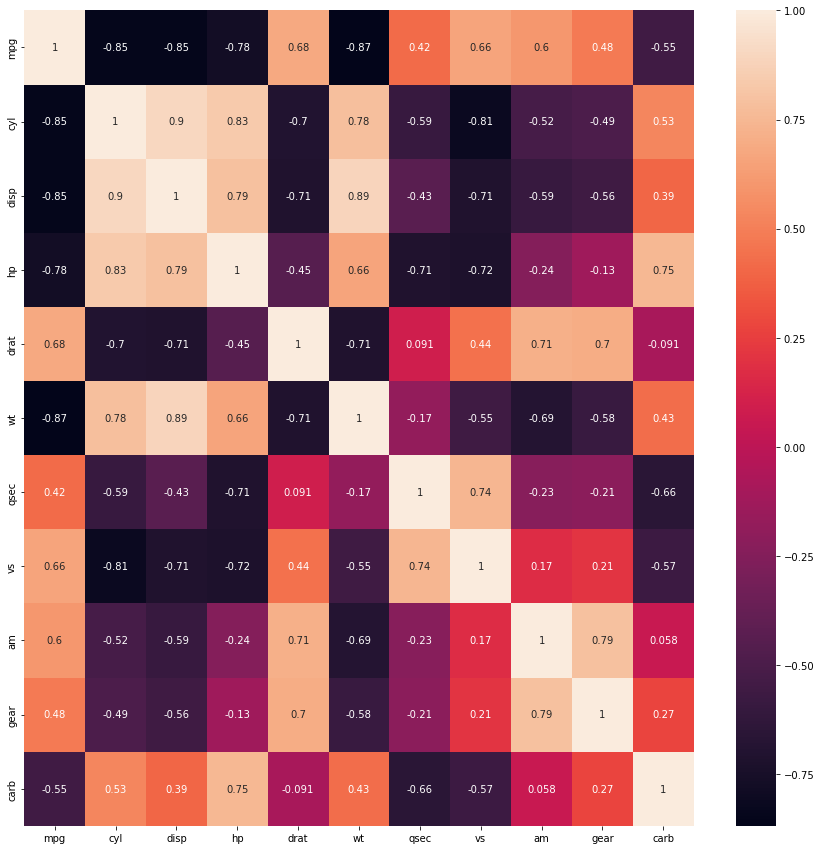

In [92]:
plt.figure(figsize=(15,15))
sns.heatmap(mt_cars.corr(),annot=True)

# FEATURE SELECTION BY 'SELECTKBEST' &'CHI2'

In [99]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [125]:
sb = SelectKBest(score_func=chi2,k='all')
sb

SelectKBest(k='all', score_func=<function chi2 at 0x000001DA32348E50>)

In [123]:
df = pd.read_csv('mtcars.csv')
df[:2]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [115]:
y2=df['mpg'].astype('int32')
y2[:2]

0    21
1    21
Name: mpg, dtype: int32

In [142]:
y3=df['mpg']
y3[:2]

0    21.0
1    21.0
Name: mpg, dtype: float64

In [118]:
x2=df.iloc[:,1:]
x2[:2]

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [126]:
sb.fit(x2,y2)

SelectKBest(k='all', score_func=<function chi2 at 0x000001DA32348E50>)

In [128]:
sc=sb.scores_
sc


array([1.41265993e+01, 1.74104162e+03, 7.58218037e+02, 1.52922739e+00,
       8.26411029e+00, 3.22941719e+00, 1.14476190e+01, 1.02205128e+01,
       2.13559322e+00, 1.32888889e+01])

In [130]:
sr=pd.DataFrame(sc,columns=['score'])
sr[:2]

,score
0,14.126599
1,1741.041624


In [131]:
x2.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [135]:
col=pd.DataFrame(x2.columns,columns=['specifications'])
col[:2]

,specifications
0,cyl
1,disp


In [139]:
imp=pd.concat([col,sr],axis=1)
imp

,specifications,score
0,cyl,14.126599
1,disp,1741.041624
2,hp,758.218037
3,drat,1.529227
4,wt,8.264110
5,qsec,3.229417
6,vs,11.447619
7,am,10.220513
8,gear,2.135593
9,carb,13.288889


In [141]:
large=imp.nlargest(5,'score')
large

,specifications,score
1,disp,1741.041624
2,hp,758.218037
0,cyl,14.126599
9,carb,13.288889
6,vs,11.447619


# 'Ensemble' &'extra trees classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
etc= ExtraTreesClassifier()
etc

ExtraTreesClassifier()

In [4]:
df = pd.read_csv('mobile_data.csv.csv')
df[:2]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [5]:
y4= df['price_range']
y4[:3]

0    1
1    2
2    2
Name: price_range, dtype: int64

In [6]:
x4 = df.iloc[:,:-1]
x4[:3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


In [7]:
imp4=etc.fit(x4,y4)
imp4

ExtraTreesClassifier()

In [8]:
imp_feat = imp4.feature_importances_
imp_feat

array([0.06258791, 0.02046443, 0.03234938, 0.01954128, 0.03240248,
       0.01763481, 0.03581162, 0.03357826, 0.03712986, 0.03304654,
       0.03433479, 0.04561218, 0.04908031, 0.39048274, 0.03447655,
       0.03376363, 0.03458291, 0.01406363, 0.01911332, 0.01994337])

In [9]:
imp_feat1 = pd.DataFrame(imp_feat,columns=['Score'])
imp_feat1[:2]

,Score
0,0.062588
1,0.020464


In [10]:
x4.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [11]:
spec = pd.DataFrame(x4.columns,columns=['specification'])
spec[:2]

,specification
0,battery_power
1,blue


In [21]:
d=pd.Series(imp_feat,index=x4.columns)
d

battery_power    0.062588
blue             0.020464
clock_speed      0.032349
dual_sim         0.019541
fc               0.032402
four_g           0.017635
int_memory       0.035812
m_dep            0.033578
mobile_wt        0.037130
n_cores          0.033047
pc               0.034335
px_height        0.045612
px_width         0.049080
ram              0.390483
sc_h             0.034477
sc_w             0.033764
talk_time        0.034583
three_g          0.014064
touch_screen     0.019113
wifi             0.019943
dtype: float64

In [15]:
df1=pd.DataFrame(imp_feat,index=x4.columns,columns=['score'])
df1[:2]

,score
battery_power,0.062588
blue,0.020464


In [19]:
df1.nlargest(10,'score')

,score
ram,0.390483
battery_power,0.062588
px_width,0.049080
px_height,0.045612
mobile_wt,0.037130
int_memory,0.035812
talk_time,0.034583
sc_h,0.034477
pc,0.034335
sc_w,0.033764


In [20]:
df1.nlargest(10,'score').transpose()

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,talk_time,sc_h,pc,sc_w
score,0.390483,0.062588,0.04908,0.045612,0.03713,0.035812,0.034583,0.034477,0.034335,0.033764


<AxesSubplot:>

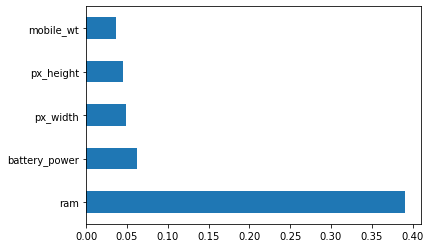

In [25]:
d.nlargest().plot(kind='barh')

In [27]:
print(df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
